## Categorical variables description
### Energie
Diesel=0,
Electrique=1,
Essence=2,
Hybride=3,
LPG/GAS=4
### Boite
Automatique=0,
Manuelle=1
### Carrosserie
4x4=0,
Berline=1,
cabriolet=2,
compacte=3,
Monospace=4,
Pick up=5
### Lien
affare=0,
autoplus=1,
tayara=2,
automobile=3,
baniola=4
### Région
Ariana=0,
Beja=1,
Ben arous=2,
Bizerte=3,
Gabes=4,
Gafsa=5,
Jendouba=6,
Kairouan=7,
Kasserine=8,
Kebili=9,
Kef=10,
Mahdia=11,
Manouba=12,
Medenine=13,
Monastir=14,
Nabeul=15,
Sfax=16,
Sidi bouzid=17,
Siliana=18,
Sousse=19,
Tataouine=20,
Tozeur=21,
Tunis=22,
Zaghouan=23
### Saison
automne=0,
ete=1,
hiver=2,
printemps=3
### Marque
Acrea=0,
Acura=1, 
Alfa Romeo=2,  
Aston Martin=3,
Audi=4,
BAIC YX=5, 
BMW=6,
BYD=7,
Bentley=8, 
Buick=9, 
Cadillac=10, 
Chery=11, 
Cheverolet=12,
Chrysler=13, 
Citroen=14,
DS=15, 
Dacia=16,
Daewoo=17, 
Daihatsu=18, 
Dodge=19,
Dongfeng=20,
Faw=21, 
Ferrari=22,
Fiat=23, 
Ford=24,
GMC=25, 
Geely=26,
Great Wall Motors=27,
Haval=28,
Honda=29, 
Hummer=30,
Hyundai=31,
Infiniti=32,
Isuzu=33, 
Iveco=34,
Jaguar=35, 
Jeep=36, 
Kia=37,
Lada=38,
Lancia=39,
Land Rover=40,
Lexus=41,
Lincoln=42,
MG Motors=43, 
MINI=44,
Mahindra=45,
Maserati=46
Mazda=47, 
Mega=48,
Mercedes-Benz=49, 
Mitsubishi=50, 
Nissan=51,
Opel=52,
Peugeot=53,
Porsche=54, 
Renault=55,
Saab Automobile=56,
Seat=57,
Skoda=58,
Smart=59,
Ssangyong=60,
Suzuki=61,
Tata=62,
Toyota=63,
Volkswagen=64,
Volvo=65,  
Wallyscar=66

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from google_currency import convert 
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import warnings
import datetime
from easy_exchange_rates import API
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('ArgusAuto.csv',sep=",")
df.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [ ]:
dfC=df.copy()

In [ ]:
dfC.shape

(24931, 15)

In [ ]:
dfC.head(5089)

#### Filling missing values of model feature

In [ ]:
for i in range(0,5088):
    dfC['Modèle']= df['Modèle'].fillna(dfC['lien'].replace(regex=['https://www.affare.tn/annonce/'],value=' ')) 

In [ ]:
for i in range(0,5088):
    dfC['Modèle']=dfC.Modèle.str.replace("(-).*","")

#### Filling missing values of Marque feature

In [ ]:
indexModelVols=dfC[(dfC['Modèle'].str.contains('golf'))|(dfC['Modèle'].str.contains('volkswagen'))| (dfC['Modèle'].str.contains('Volkswagen'))|(dfC['Modèle'].str.contains('polo'))| (dfC['Modèle'].str.contains('amarok'))| (dfC['Modèle'].str.contains('passat')) |(dfC['Modèle'].str.contains('caddy'))].index
dfC.loc[indexModelVols,['Marque']] = 'Volkswagen'
indexModelBMW=dfC[dfC['Modèle'].str.contains('Serie') | (dfC['Modèle'].str.contains('bmw'))|(dfC['Modèle'].str.contains('x5'))|(dfC['Modèle'].str.contains('BMW'))].index
dfC.loc[indexModelBMW,['Marque']] = 'BMW'
indexModelCitro=dfC[dfC['Modèle'].str.contains('citroen') | (dfC['Modèle'].str.contains('C4')) |(dfC['Modèle'].str.contains('Citro'))| (dfC['Modèle'].str.contains('c1'))|(dfC['Modèle'].str.contains('c3'))| (dfC['Modèle'].str.contains('C5'))|(dfC['Modèle'].str.contains('C3'))| (dfC['Modèle'].str.contains('c4'))].index
dfC.loc[indexModelCitro,['Marque']] = 'Citroen'
indexModelty=dfC[dfC['Modèle'].str.contains('toyota')|(dfC['Modèle'].str.contains('Toyota'))].index
dfC.loc[indexModelty,['Marque']] = 'Toyota'
indexModelAu=dfC[(dfC['Modèle'].str.contains('q5')) |(dfC['Modèle'].str.contains('Audi'))|(dfC['Modèle'].str.contains('audi'))|(dfC['Modèle'].str.contains('A4'))].index
dfC.loc[indexModelAu,['Marque']] = 'Audi'
indexModelsk=dfC[dfC['Modèle'].str.contains('skoda')|(dfC['Modèle'].str.contains('Skoda'))].index
dfC.loc[indexModelsk,['Marque']] = 'Skoda'
indexModelIn=dfC[(dfC['Modèle']=='Ex') | (dfC['Modèle']=='G') | (dfC['Modèle']=='Q30') |  (dfC['Modèle']=='Q60') |(dfC['Modèle'].str.contains('Infiniti'))].index
dfC.loc[indexModelIn,['Marque']] = 'Infiniti'
indexModelhv=dfC[(dfC['Modèle'].str.contains('haval'))|(dfC['Modèle'].str.contains('Haval'))].index
dfC.loc[indexModelhv,['Marque']] = 'Haval'
indexModelch=dfC[dfC['Modèle'].str.contains('chevrolet')|(dfC['Modèle'].str.contains('Chevrolet'))].index
dfC.loc[indexModelch,['Marque']] = 'Chevrolet'
indexModelran=dfC[dfC['Modèle'].str.contains('Range')|(dfC['Modèle'].str.contains('land'))|(dfC['Modèle'].str.contains('Land'))|(dfC['Modèle'].str.contains('Rover'))].index
dfC.loc[indexModelran,['Marque']] = 'Land Rover'
indexModelrdd=dfC[(dfC['Modèle'].str.contains('dodge'))|(dfC['Modèle'].str.contains('Dodge'))].index
dfC.loc[indexModelrdd,['Marque']] = 'Dodge'
indexModelpg=dfC[(dfC['Modèle'].str.contains('peugeot'))|(dfC['Modèle'].str.contains('308'))|(dfC['Modèle'].str.contains('c-elysee'))|(dfC['Modèle'].str.contains('partner')) |(dfC['Modèle'].str.contains('205'))|(dfC['Modèle'].str.contains('406'))|(dfC['Modèle'].str.contains('407'))|(dfC['Modèle'].str.contains('103')) |(dfC['Modèle'].str.contains('206'))|(dfC['Modèle'].str.contains('Peugeot'))|(dfC['Modèle'].str.contains('3008'))|(dfC['Modèle'].str.contains('207'))|(dfC['Modèle'].str.contains('301')) |(dfC['Modèle'].str.contains('307'))].index
dfC.loc[indexModelpg,['Marque']] = 'Peugeot'
indexModelmer=dfC[(dfC['Modèle'].str.contains('e220')) |(dfC['Modèle'].str.contains('gl320')) |(dfC['Modèle'].str.contains('slk'))|(dfC['Modèle'].str.contains('mercedes'))|(dfC['Modèle'].str.contains('Mercedes'))].index
dfC.loc[indexModelmer,['Marque']] = 'Mercedes'
indexModelren=dfC[(dfC['Modèle'].str.contains('renault'))|(dfC['Modèle'].str.contains('r11')) |(dfC['Modèle'].str.contains('r5'))| (dfC['Modèle'].str.contains('modus'))|(dfC['Modèle'].str.contains('megane')) |(dfC['Modèle'].str.contains('Renault'))| (dfC['Modèle'].str.contains('clio')) | (dfC['Modèle'].str.contains('symbole'))].index
dfC.loc[indexModelren,['Marque']] = 'Renault'
indexModelmaz=dfC[dfC['Modèle'].str.contains('mazda')|(dfC['Modèle'].str.contains('Mazda'))].index
dfC.loc[indexModelmaz,['Marque']] = 'Mazda'
indexModelsea=dfC[(dfC['Modèle'].str.contains('seat')) |(dfC['Modèle'].str.contains('ibiza'))|(dfC['Modèle'].str.contains('Seat')) ].index
dfC.loc[indexModelsea,['Marque']] = 'Seat'
indexModelkia=dfC[(dfC['Modèle'].str.contains('kia')) |(dfC['Modèle'].str.contains('KIA'))|(dfC['Modèle'].str.contains('Kia'))|(dfC['Modèle'].str.contains('cerato'))|(dfC['Modèle'].str.contains('picanto'))].index
dfC.loc[indexModelkia,['Marque']] = 'Kia'
indexModelford=dfC[(dfC['Modèle'].str.contains('ford')) |(dfC['Modèle'].str.contains('fiesta'))|(dfC['Modèle'].str.contains('Ford'))].index
dfC.loc[indexModelford,['Marque']] = 'Ford'
indexModelfiat=dfC[(dfC['Modèle'].str.contains('fiat'))| (dfC['Modèle'].str.contains('palio'))|(dfC['Modèle'].str.contains('Punto'))|(dfC['Modèle'].str.contains('Fiat'))].index
dfC.loc[indexModelfiat,['Marque']] = 'Fiat'
indexModelfiat=dfC[(dfC['Modèle'].str.contains('dacia'))|(dfC['Modèle'].str.contains('Dacia')) |(dfC['Modèle'].str.contains('duster')) |(dfC['Modèle'].str.contains('jogger')) | (dfC['Modèle'].str.contains('lodgy')) |(dfC['Modèle'].str.contains('logan'))|(dfC['Modèle'].str.contains('sandero')) |(dfC['Modèle'].str.contains('dokker'))].index
dfC.loc[indexModelfiat,['Marque']] = 'Dacia'
indexModelopel=dfC[(dfC['Modèle'].str.contains('opel'))|(dfC['Modèle'].str.contains('astra'))|(dfC['Modèle'].str.contains('Opel'))].index
dfC.loc[indexModelopel,['Marque']] = 'Opel'
indexModelhu=dfC[(dfC['Modèle'].str.contains('hyundai'))|(dfC['Modèle'].str.contains('i10'))|(dfC['Modèle'].str.contains('Hyundai'))|(dfC['Modèle'].str.contains('Genesis G70 Brillance bs6'))].index
dfC.loc[indexModelhu,['Marque']] = 'Hyundai'
indexModelch=dfC[(dfC['Modèle'].str.contains('tiggo')) | (dfC['Modèle'].str.contains('chery'))|(dfC['Modèle'].str.contains('Chery'))].index
dfC.loc[indexModelch,['Marque']] = 'Chery'
indexModelnss=dfC[(dfC['Modèle'].str.contains('nissan')) | (dfC['Modèle'].str.contains('Juke'))|(dfC['Modèle'].str.contains('Qashqai'))|(dfC['Modèle'].str.contains('juke'))|(dfC['Modèle'].str.contains('Nissan'))].index
dfC.loc[indexModelnss,['Marque']] = 'Nissan'
indexModelsuz=dfC[(dfC['Modèle'].str.contains('suzuki'))|(dfC['Modèle'].str.contains('Suzuki'))].index
dfC.loc[indexModelsuz,['Marque']] = 'Suzuki'
indexModelgel=dfC[(dfC['Modèle'].str.contains('geely'))|(dfC['Modèle'].str.contains('Geely'))].index
dfC.loc[indexModelgel,['Marque']] = 'Geely'
indexModelje=dfC[(dfC['Modèle'].str.contains('jeep'))|(dfC['Modèle'].str.contains('Jeep'))].index
dfC.loc[indexModelje,['Marque']] = 'Jeep'
indexModelis=dfC[(dfC['Modèle'].str.contains('isuzu'))|(dfC['Modèle'].str.contains('Isuzu'))].index
dfC.loc[indexModelis,['Marque']] = 'Isuzu'
indexModelmg=dfC[(dfC['Modèle'].str.contains('mg'))|(dfC['Modèle'].str.contains('Mg'))|(dfC['Modèle'].str.contains('MG'))].index
dfC.loc[indexModelmg,['Marque']] = 'MG'
indexModelss=dfC[(dfC['Modèle'].str.contains('Ssangyong'))|(dfC['Modèle'].str.contains('ssangyong'))|(dfC['Modèle'].str.contains('Tivoli'))|(dfC['Modèle'].str.contains('tivoli'))].index
dfC.loc[indexModelss,['Marque']] = 'Ssangyong'
indexModelvo=dfC[(dfC['Modèle'].str.contains('volvo'))|(dfC['Modèle'].str.contains('Volvo'))].index
dfC.loc[indexModelvo,['Marque']] = 'Volvo'
indexModelds=dfC[(dfC['Modèle'].str.contains('DS'))|(dfC['Modèle'].str.contains('Ds'))|(dfC['Modèle'].str.contains('ds'))].index
dfC.loc[indexModelds,['Marque']] = 'DS'
indexModelfa=dfC[dfC['Modèle'].str.contains('Faw')].index
dfC.loc[indexModelfa,['Marque']] = 'Faw'
indexModelmt=dfC[(dfC['Modèle'].str.contains('Mitsubishi'))|(dfC['Modèle'].str.contains('mitsubishi'))].index
dfC.loc[indexModelmt,['Marque']] = 'Mitsubishi'                                                      
indexModelho=dfC[(dfC['Modèle'].str.contains('Honda'))].index
dfC.loc[indexModelho,['Marque']] = 'Honda'
indexModelpo=dfC[(dfC['Modèle'].str.contains('Porsche'))|(dfC['Modèle'].str.contains('porsche'))].index
dfC.loc[indexModelpo,['Marque']] = 'Porsche'
indexModelalf=dfC[(dfC['Modèle'].str.contains('Alfa Romeo'))].index
dfC.loc[indexModelalf,['Marque']] = 'Alfa Romeo'
indexModelmin=dfC[(dfC['Modèle'].str.contains('Mini'))|(dfC['Modèle'].str.contains('mini'))].index
dfC.loc[indexModelmin,['Marque']] = 'MINI'
indexModeliv=dfC[(dfC['Modèle'].str.contains('Iveco'))|(dfC['Modèle'].str.contains('iveco'))].index
dfC.loc[indexModeliv,['Marque']] = 'Iveco'
indexModelbai=dfC[(dfC['Modèle'].str.contains('BAIC'))|(dfC['Modèle'].str.contains('Baic'))|(dfC['Modèle'].str.contains('baic'))].index
dfC.loc[indexModelbai,['Marque']] = 'BAIC YX'
indexModelgra=dfC[(dfC['Modèle'].str.contains('great'))].index
dfC.loc[indexModelgra,['Marque']] = 'Great Wall'
indexModelbta=dfC[(dfC['Modèle'].str.contains('Tata'))].index
dfC.loc[indexModelbta,['Marque']] = 'Tata'
indexModellin=dfC[(dfC['Modèle'].str.contains('Lincoln'))].index
dfC.loc[indexModellin,['Marque']] = 'Lincoln'
indexModelmahin=dfC[(dfC['Modèle'].str.contains('Mahindra'))].index
dfC.loc[indexModelmahin,['Marque']] = 'Mahindra'
indexModeljag=dfC[(dfC['Modèle'].str.contains('Jaguar'))].index
dfC.loc[indexModeljag,['Marque']] = 'Jaguar'
indexModeldong=dfC[(dfC['Modèle'].str.contains('Dongfeng'))].index
dfC.loc[indexModeldong,['Marque']] = 'Dongfeng'
indexModeldfs=dfC[(dfC['Modèle'].str.contains('DFSK'))].index
dfC.loc[indexModeldfs,['Marque']] = 'DFSK'
indexModelhum=dfC[(dfC['Modèle'].str.contains('Hummer'))].index
dfC.loc[indexModelhum,['Marque']] = 'Hummer'
indexModelgre=dfC[(dfC['Modèle'].str.contains('Great Wall'))].index
dfC.loc[indexModelgre,['Marque']] = 'Great Wall'
indexModelwal=dfC[(dfC['Modèle'].str.contains('Wallys'))].index
dfC.loc[indexModelwal,['Marque']] = 'Wallys'
indexModelsma=dfC[(dfC['Modèle'].str.contains('Smart'))].index
dfC.loc[indexModelsma,['Marque']] = 'Smart'
indexModellanc=dfC[(dfC['Modèle'].str.contains('Lancia'))].index
dfC.loc[indexModellanc,['Marque']] = 'Lancia'

#### delete the non-essential modalities and leave only manual and automatic  

In [ ]:
indexes=dfC[(dfC['Boite'].str.startswith('Automatique')==False) & (dfC['Boite'].str.startswith('Boîte')==False) & (dfC['Boite'].str.startswith('Boite')==False) & (dfC['Boite'].str.startswith('Manuelle')==False)].index
dfC.drop(indexes , inplace=True)
dfC = dfC.reset_index(drop=True)

In [ ]:
dfC['Boite']=dfC['Boite'].replace("Boîte 5","Manuelle")
dfC['Boite']=dfC['Boite'].replace("Boite 6 vitesse","Manuelle")
dfC['Boite']=dfC['Boite'].replace("Boîte 6","Manuelle")
dfC['Boite']=dfC['Boite'].replace("Boite auto6 cheveauxEsscenceKil 57000","Automatique")

In [ ]:
dfC['Boite'].unique()

In [ ]:
dfC['Region']=dfC.Region.str.replace("(Ariana).*","Ariana")
dfC['Region']=dfC.Region.str.replace("(La Manouba).*","Manouba")
dfC['Region']=dfC.Region.str.replace("(Tunis).*","Tunis")
dfC['Region']=dfC.Region.str.replace("(Bizerte).*","Bizerte")
dfC['Region']=dfC.Region.str.replace("(Ben).*","Ben arous")
dfC['Region']=dfC.Region.str.replace("(Sousse).*","Sousse")
dfC['Region']=dfC.Region.str.replace("(Jendouba).*","Jendouba")
dfC['Region']=dfC.Region.str.replace("(Nabeul).*","Nabeul")
dfC['Region']=dfC.Region.str.replace("(Gabès).*","Gabes")
dfC['Region']=dfC.Region.str.replace("(Monastir).*","Monastir")
dfC['Region']=dfC.Region.str.replace("(Sfax).*","Sfax")
dfC['Region']=dfC.Region.str.replace("(Gafsa).*","Gafsa")
dfC['Region']=dfC.Region.str.replace("(Béja).*","Beja")
dfC['Region']=dfC.Region.str.replace("(Sidi).*","Sidi Bouzid")
dfC['Region']=dfC.Region.str.replace("(kasserine).*","Kasserine")
dfC['Region']=dfC.Region.str.replace("(Mahdia).*","Mahdia")
dfC['Region']=dfC.Region.str.replace("(Tozeur).*","Tozeur")
dfC['Region']=dfC.Region.str.replace("(Kairouan).*","Kairouan")
dfC['Region']=dfC.Region.str.replace("(Zaghouan).*","Zaghouan")
dfC['Region']=dfC.Region.str.replace("(Médenine).*","Medenine")
dfC['Region']=dfC.Region.str.replace("(kef).*","Kef")
dfC['Region']=dfC.Region.str.replace("(Siliana).*","Siliana")
dfC['Region']=dfC.Region.str.replace("(Tataouine).*","Tataouine")
dfC['Region']=dfC.Region.str.replace("(Kebili).*","Kebili")

In [ ]:
dfC['Region'].unique()

In [ ]:
dfC['carrosserie'].unique()

In [ ]:
dfC['Energie'].unique()

#### Get the number of the month from its name 

In [ ]:
dfC=dfC.replace(regex=['Janv.'],value='/1/')
dfC=dfC.replace(regex=['Fèvr.'],value='/2/')
dfC=dfC.replace(regex=['Mar.'],value='/3/')
dfC=dfC.replace(regex=['Avr.'],value='/4/')
dfC=dfC.replace(regex=['Mai.'],value='/5/')
dfC=dfC.replace(regex=['Juin.'],value='/6/')
dfC=dfC.replace(regex=['Juil.'],value='/7/')
dfC=dfC.replace(regex=['Aoû.'],value='/8/')
dfC=dfC.replace(regex=['Sept.'],value='/9/')
dfC=dfC.replace(regex=['Oct.'],value='/10/')
dfC=dfC.replace(regex=['Nov.'],value='/11/')
dfC=dfC.replace(regex=['Déc.'],value='/12/')
dfC=dfC.replace(regex=['janvier'],value='/1/')
dfC=dfC.replace(regex=['février.'],value='/2/')
dfC=dfC.replace(regex=['mars.'],value='/3/')
dfC=dfC.replace(regex=['avril.'],value='/4/')
dfC=dfC.replace(regex=['mai.'],value='/5/')
dfC=dfC.replace(regex=['juin.'],value='/6/')
dfC=dfC.replace(regex=['juillet.'],value='/7/')
dfC=dfC.replace(regex=['août.'],value='/8/')
dfC=dfC.replace(regex=['septembre.'],value='/9/')
dfC=dfC.replace(regex=['octobre.'],value='/10/')
dfC=dfC.replace(regex=['novembre.'],value='/11/')
dfC=dfC.replace(regex=['décembre.'],value='/12/')

In [ ]:
dfC.drop( dfC[ dfC['Date Annonce'] == "29 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "27 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "25 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "24 /4/l 2020" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "22 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "21 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "20 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "19 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "18 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "16 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "15 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "14 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "10 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "12 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "13 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "8 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "7 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "6 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "5 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "4 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "3 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "2 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "1 /4/l 2021" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "6 /4/l 2020" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "25 /4/l 2019" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "22 /4/l 2019" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "17 /4/l 2019" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "14 /4/l 2019" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "3 /4/l 2019" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "2 /4/l 2019" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "26 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "25 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "23 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "21 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "18 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "16 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "13 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "12 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "10 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "9 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "8 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "4 /4/l 2018" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "29 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "27 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "24 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "22 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "20 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "18 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "17 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "12 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "10 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "9 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "8 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "6 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "5 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "4 /4/l 2017" ].index, inplace=True)
dfC.drop( dfC[ dfC['Date Annonce'] == "3 /4/l 2017" ].index, inplace=True)
dfC['Date Annonce'] = pd.to_datetime(dfC['Date Annonce']).dt.strftime('%d/%m/%y')

#### Get month and season from date annonce feature 

In [ ]:
dfC['Mois'] = pd.DatetimeIndex(dfC['Date Annonce']).month

In [ ]:
dfC['Mois'] = dfC['Mois'].fillna(df['Mois'].mode()[0])

In [ ]:
dfC.loc[(dfC["Mois"].isin([3,4,5]) ),'saison']="printemps"
dfC.loc[(dfC["Mois"].isin([6,7,8]) ),'saison']="ete"
dfC.loc[(dfC["Mois"].isin([9,10,11]) ),'saison']="automne"
dfC.loc[(dfC["Mois"].isin([12,1,2]) ),'saison']="hiver"

#### Filling Month and year with most frequent value

In [ ]:
dfC['Année'] = dfC['Année'].fillna(df['Année'].mode()[0])
dfC['Energie'] = dfC['Energie'].fillna(df['Energie'].mode()[0])
dfC['Puissance'] = dfC['Puissance'].fillna(df['Puissance'].mode()[0])
dfC['Marque'] = dfC['Marque'].fillna(df['Marque'].mode()[0])
dfC['carrosserie'] = dfC['carrosserie'].fillna(df['carrosserie'].mode()[0])
dfC['Boite'] = dfC['Boite'].fillna(df['Boite'].mode()[0])
dfC['Region'] = dfC['Region'].fillna(df['Region'].mode()[0])

In [ ]:
dfC['lien']=dfC.lien.str.replace("(/a).*","")
dfC=dfC.replace(regex=['https://.'],value='')
dfC['lien'].head(6000)

0        www.affare.tn
1        www.affare.tn
2        www.affare.tn
3        www.affare.tn
4        www.affare.tn
             ...      
5995    www.baniola.tn
5996    www.baniola.tn
5997    www.baniola.tn
5998    www.baniola.tn
5999    www.baniola.tn
Name: lien, Length: 6000, dtype: object

In [ ]:
dfC['lien']=dfC['lien'].replace("aniola.tn","www.baniola.tn")
dfC['lien']=dfC['lien'].replace("ww.affare.tn","www.affare.tn")
dfC['lien']=dfC['lien'].replace("ww.tayara.tn","www.tayara.tn")

In [ ]:
# dfC.Année = pd.to_numeric(dfC.Année, 'coerce')
dfC.Année[dfC.Année == dfC.Année // 1]

0        2019.0
1        2012.0
2        2018.0
3        2007.0
4        2015.0
          ...  
24926    2008.0
24927    2007.0
24928    2014.0
24929    2009.0
24930    2000.0
Name: Année, Length: 24916, dtype: float64

#### Reindexing the dataframe and removing date annonce feature

In [ ]:
"""Reindexing DataFrame so that price feature will at last"""
dfC=dfC.reindex(columns=['lien', 'Energie', 'Kilométrage', 'Puissance', 'Année','Mois','saison','Boite', 'Region', 'Modèle', 'Marque', 'carrosserie','prix'])

In [ ]:
dfC

,lien,Energie,Kilométrage,Puissance,Année,Mois,saison,Boite,Region,Modèle,Marque,carrosserie,prix
0,www.affare.tn,Essence,30000.0,4.0,2019.0,2.0,hiver,Manuelle,Ariana,toyota,Toyota,Berline,31000.0
1,www.affare.tn,Diesel,190000.0,10.0,2012.0,2.0,hiver,Automatique,Manouba,q5,Audi,Berline,85000.0
2,www.affare.tn,Essence,94000.0,6.0,2018.0,2.0,hiver,Manuelle,Tunis,golf,Volkswagen,Berline,94000.0
3,www.affare.tn,Essence,183000.0,5.0,2007.0,2.0,hiver,NaN,NaN,une,Volkswagen,Berline,NaN
4,www.affare.tn,Essence,140000.0,5.0,2015.0,2.0,hiver,NaN,NaN,skoda,Skoda,Berline,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24926,www.tayara.tn,Essence,199.0,6.0,2008.0,11.0,automne,Manuelle,Tunis,C4,Citroen,Berline,21700.0
24927,www.tayara.tn,Essence,184.0,7.0,2007.0,11.0,automne,Manuelle,Tunis,Serie 3,BMW,Berline,0.0
24928,www.tayara.tn,Essence,180000.0,6.0,2014.0,11.0,automne,Manuelle,Nabeul,C4,Citroen,Berline,30000.0
24929,www.tayara.tn,Diesel,0.0,6.0,2009.0,11.0,automne,Manuelle,Manouba,C5,Citroen,Berline,0.0


In [ ]:
dfC.isnull().sum()

lien              0
Energie           0
Kilométrage    1323
Puissance         0
Année             0
Mois              0
saison            0
Boite             0
Region            0
Modèle            0
Marque            0
carrosserie       0
prix           1076
dtype: int64

In [ ]:
indexprix=dfC[dfC.prix.isna()].index
dfC.drop(indexprix, inplace=True)
dfC = dfC.reset_index(drop=True)

In [ ]:
dfC.isnull().sum()

lien           0
Energie        0
Kilométrage    0
Puissance      0
Année          0
Mois           0
saison         0
Boite          0
Region         0
Modèle         0
Marque         0
carrosserie    0
prix           0
dtype: int64

In [ ]:
plt.figure(figsize=(80,80))

plt.subplot(5,2,1)
plt1 = dfC.Marque.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car Marque', ylabel='Frequency of company')

plt.subplot(5,2,2)
plt1 = dfC.Energie.value_counts().plot(kind='bar')
plt.title('Energie Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(5,2,3)
plt1 = dfC.carrosserie.value_counts().plot(kind='bar')
plt.title('carrosserie Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.subplot(5,2,4)
plt1 = dfC.Region.value_counts().plot(kind='bar')
plt.title('Region Histogram')
plt1.set(xlabel = 'Car Region', ylabel='Frequency of  Government')

plt.subplot(5,2,5)
plt1 = dfC.Puissance.value_counts().plot(kind='bar')
plt.title('Puissance Histogram')
plt1.set(xlabel = 'Car Puissance', ylabel='Frequency of  Puissance')

plt.subplot(5,2,6)
plt1 = dfC.saison.value_counts().plot(kind='bar')
plt.title('Saison Histogram')
plt1.set(xlabel = 'Saison ', ylabel='Frequency of Season')

plt.subplot(5,2,7)
plt1 = dfC.Boite.value_counts().plot(kind='bar')
plt.title('Boite Histogram')
plt1.set(xlabel = 'Boite ', ylabel='Frequency of  Boite')

plt.subplot(5,2,8)
plt1 = dfC.lien.value_counts().plot(kind='bar')
plt.title('lien Histogram')
plt1.set(xlabel = 'lien ', ylabel='Frequency of Link')

plt.subplot(5,2,9)
plt1 = dfC.Année.value_counts().plot(kind='bar')
plt.title('Année Histogram')
plt1.set(xlabel = 'Année ', ylabel='Frequency of Année')

plt.subplot(5,2,10)
plt1 = dfC.Mois.value_counts().plot(kind='bar')
plt.title('Mois Histogram')
plt1.set(xlabel = 'Mois ', ylabel='Frequency of Mois')
plt.show()


In [ ]:
plt.figure(figsize=(50,50))
sns.set(font_scale=2)
sns.boxplot(x='prix', y='Marque', data=dfC)
plt.grid()

In [ ]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Mois', y='prix',hue='Energie',
             data=dfC)

In [ ]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Season VS FuelType")
sns.lineplot(x='saison', y='prix',hue='Energie',
             data=dfC)

In [ ]:
cols_to_log = dfC.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(dfC[colname], kde=True)
    plt.show()

In [ ]:
#Price and LOcation 
plt.figure(figsize=(50,15))
sns.set(font_scale=2)
sns.barplot(x='Region', y='prix', data=dfC)
plt.grid()

In [ ]:
dfC=dfC.reindex(columns=['lien', 'Energie', 'Kilométrage', 'Puissance', 'Année','Mois','saison','Boite', 'Region', 'Modèle', 'Marque', 'carrosserie','prix'])

In [ ]:
#Filling nan saison and mois rows with most frequent value
#dfC['saison'] = dfC['saison'].fillna(dfC['saison'].mode()[0])

In [ ]:
dfCopyy=dfC.copy()

#### Estimating better iterative imputer method

In [ ]:
#define numeric variable and categorical variable to work separatly on them
num_col=['Kilométrage','Puissance','Année','Mois']
cat_cols=['lien','Region','Energie','carrosserie','Modèle','Marque','Boite','saison']

In [ ]:
check_imputer=dfC.copy()
#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 108.60it/s]


In [ ]:
# Estimate the score on the entire dataset by filling missing values by mean and median

br_estimator = BayesianRidge() #base estimator
N_SPLITS = 6  #defining the cross-validation splitting strategy

score_simple_imputer = pd.DataFrame() #dataframe to store error of imputer
#computing MSE for mean and median
for strategy in ('mean', 'median'):
    X=check_imputer.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
    y = np.ravel(check_imputer.iloc[:,-1:])
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X, y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

In [ ]:
# Estimate the score on the entire dataset by filling missing values by 4 different iterative imputer


#estimators for IterativeImputer
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=check_imputer.copy()
        for col in check_imputer.columns:
            #col=check_imputer.columns[i]
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X=df_new.iloc[:,:-1]
        #y=check_imputer.iloc[:,-1:].values.ravel()
        y = np.ravel(df_new.iloc[:,-1:])
        score_iterative_imputer[esti.__class__.__name__] = cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)

Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


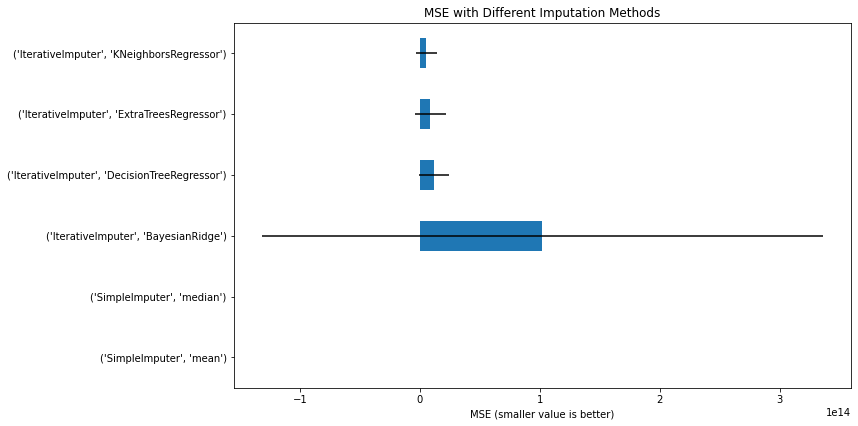

In [ ]:
#ploting the graphs of scores each method
scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)
fig, ax = plt.subplots(figsize=(12, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

#### Filling Numerical Missing Values 

In [ ]:
dfC.isnull().sum()[num_col]

Kilométrage    1323
Puissance         0
Année             0
Mois              0
dtype: int64

In [ ]:
data_num=dfC[num_col]
imputer_num=IterativeImputer(estimators[1]) #estimators[1] KNNRegressor
impute_data=imputer_num.fit_transform(data_num)
dfC[num_col]=impute_data

In [ ]:
#Missing values after filling
dfC.isnull().sum()[num_col]

Kilométrage    0
Puissance      0
Année          0
Mois           0
dtype: int64

#### Filling Categorical missing values 

In [ ]:
#Missing values before filling
dfC.isnull().sum()[cat_cols]

lien           0
Region         0
Energie        0
carrosserie    0
Modèle         0
Marque         0
Boite          0
saison         0
dtype: int64

In [ ]:
dfC

,lien,Energie,Kilométrage,Puissance,Année,Mois,saison,Boite,Region,Modèle,Marque,carrosserie,prix
0,www.affare.tn,Essence,30000.0,4.0,2019.0,2.0,hiver,Manuelle,Ariana,toyota,Toyota,Berline,31000.0
1,www.affare.tn,Diesel,190000.0,10.0,2012.0,2.0,hiver,Automatique,Manouba,q5,Audi,Berline,85000.0
2,www.affare.tn,Essence,94000.0,6.0,2018.0,2.0,hiver,Manuelle,Tunis,golf,Volkswagen,Berline,94000.0
3,www.affare.tn,Essence,7000.0,4.0,2021.0,2.0,hiver,Manuelle,Tunis,clio,Renault,Berline,39800.0
4,www.affare.tn,Essence,125796.0,6.0,2006.0,2.0,hiver,Manuelle,Tunis,dame,Volkswagen,Berline,17500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23850,www.tayara.tn,Essence,199.0,6.0,2008.0,11.0,automne,Manuelle,Tunis,C4,Citroen,Berline,21700.0
23851,www.tayara.tn,Essence,184.0,7.0,2007.0,11.0,automne,Manuelle,Tunis,Serie 3,BMW,Berline,0.0
23852,www.tayara.tn,Essence,180000.0,6.0,2014.0,11.0,automne,Manuelle,Nabeul,C4,Citroen,Berline,30000.0
23853,www.tayara.tn,Diesel,0.0,6.0,2009.0,11.0,automne,Manuelle,Manouba,C5,Citroen,Berline,0.0


In [ ]:
dfC.shape

(23855, 13)

#### Outliers

In [ ]:
from IPython.display import display,Latex
outliers_condi=Latex(r" $\textbf{W𝑒 𝑐𝑎𝑛 𝑠𝑎𝑦 $𝑥_1$ or $x_2$ 𝑖𝑠 𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠 if }\\ x_1 < Q1 - 1.5*IQR \\ or\\ x_2 > Q3+1.5*IQR $")
outliers_info=Latex(r"$L_{p} = \frac{p}{100}(n+1) = i_p.f_p \\ where \,\, i_p \,\, is \,\, integer \,\, part \,\, of \,\, L_p \,\, and \,\, f_p \,\, is \,\, fractional \,\, part \,\, of \,\, L_p \\ Q1 = Y_{25} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ Q3 = Y_{75} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ IQR = Q3-Q1 \\ x_1 = Q1 - 1.5*IQR \,\,and\,\, x_2 = Q3+1.5*IQR $")

In [ ]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

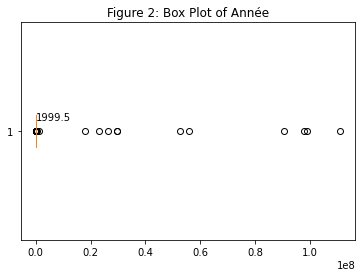

In [ ]:
fig, ax1 = plt.subplots()
o1,o2=outliers(dfC,'Année')
ax1.set_title('Figure 2: Box Plot of Année')
ax1.boxplot(dfC['Année'], vert=False)
ax1.text(o1-8,1.05,str(round(o1,2)))
plt.savefig('graph-boxplot-annee.jpg')
plt.show()

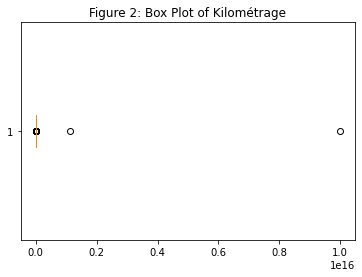

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Kilométrage')
ax1.boxplot(dfC['Kilométrage'], vert=False)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

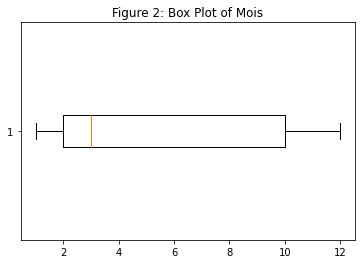

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Mois')
ax1.boxplot(dfC['Mois'], vert=False)
plt.savefig('graph-boxplot-month.jpg')
plt.show()

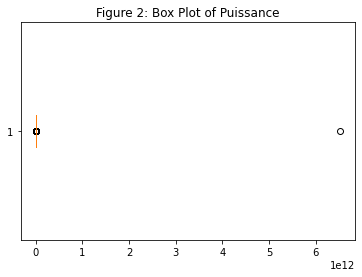

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Puissance')
ax1.boxplot(dfC['Puissance'], vert=False)
plt.savefig('graph-boxplot-puissance.jpg')
plt.show()

In [ ]:
dfC

,lien,Energie,Kilométrage,Puissance,Année,Mois,saison,Boite,Region,Modèle,Marque,carrosserie,prix
0,www.affare.tn,Essence,30000.0,4.0,2019.0,2.0,hiver,Manuelle,Ariana,toyota,Toyota,Berline,31000.0
1,www.affare.tn,Diesel,190000.0,10.0,2012.0,2.0,hiver,Automatique,Manouba,q5,Audi,Berline,85000.0
2,www.affare.tn,Essence,94000.0,6.0,2018.0,2.0,hiver,Manuelle,Tunis,golf,Volkswagen,Berline,94000.0
3,www.affare.tn,Essence,7000.0,4.0,2021.0,2.0,hiver,Manuelle,Tunis,clio,Renault,Berline,39800.0
4,www.affare.tn,Essence,125796.0,6.0,2006.0,2.0,hiver,Manuelle,Tunis,dame,Volkswagen,Berline,17500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23850,www.tayara.tn,Essence,199.0,6.0,2008.0,11.0,automne,Manuelle,Tunis,C4,Citroen,Berline,21700.0
23851,www.tayara.tn,Essence,184.0,7.0,2007.0,11.0,automne,Manuelle,Tunis,Serie 3,BMW,Berline,0.0
23852,www.tayara.tn,Essence,180000.0,6.0,2014.0,11.0,automne,Manuelle,Nabeul,C4,Citroen,Berline,30000.0
23853,www.tayara.tn,Diesel,0.0,6.0,2009.0,11.0,automne,Manuelle,Manouba,C5,Citroen,Berline,0.0


In [ ]:
#removing outliers 
df_new=dfC.copy()
out=np.array(['Année','Kilométrage','Puissance','prix','Mois'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['prix']!=0]
#df_new.drop('prix',axis=1,inplace=True)

IQR of Année = 1999.5 2027.5
IQR of Kilométrage = -226000.0 438000.0
IQR of Puissance = 2.0 10.0
IQR of prix = -23750.0 70250.0
IQR of Mois = -10.0 22.0


In [ ]:
print("Shape before process=",dfC.shape)
print("Shape After process=",df_new.shape)
diff=dfC.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,dfC.shape[1]-df_new.shape[1]))
#df_new.to_csv("vehiclesFinal.csv",index=False)

Shape before process= (23855, 13)
Shape After process= (16278, 13)
Total 7577 rows and 0 cols removed


In [ ]:
check_imputer=df_new.copy()
#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 206.88it/s]


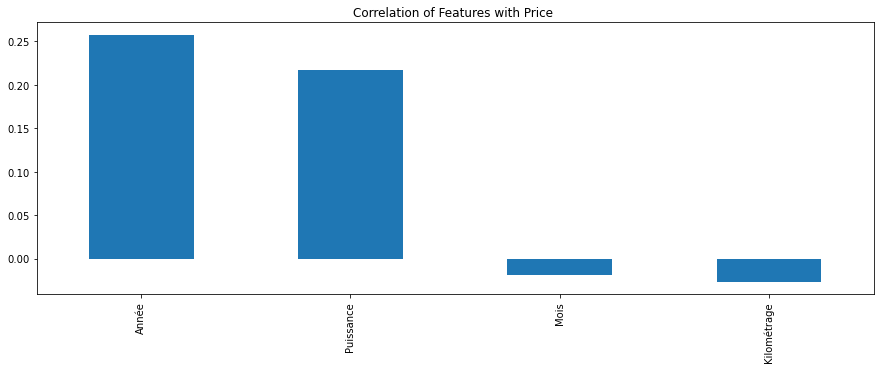

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with Price ")
check_imputer.corr()['prix'].drop(index='prix').sort_values(ascending=False).plot(kind='bar')
plt.show()

<AxesSubplot:>

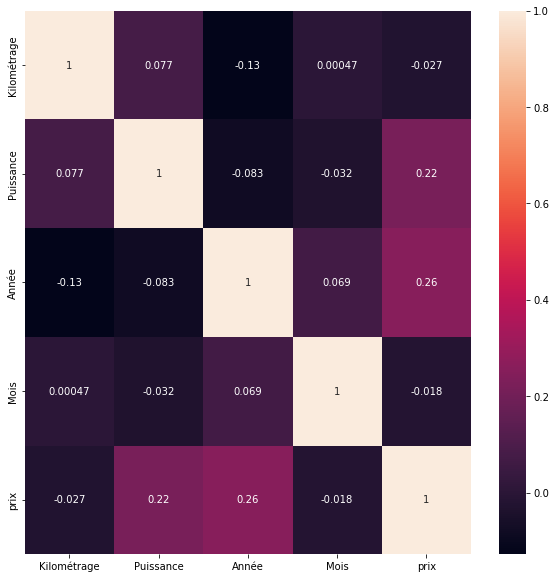

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(check_imputer.corr(), annot=True)

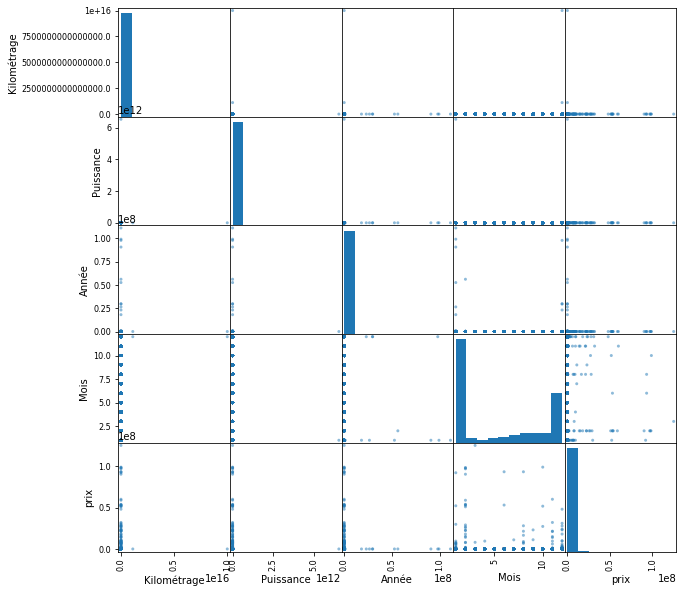

In [ ]:
pd.plotting.scatter_matrix(dfC, figsize=(10,10));

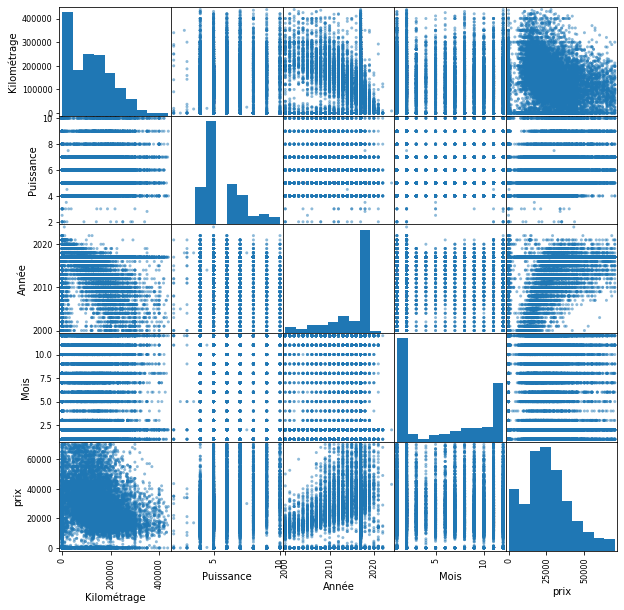

In [ ]:
pd.plotting.scatter_matrix(df_new, figsize=(10,10));

In [ ]:
today=datetime.date.today()
d1 = today.strftime("%Y-%m-%d")
api = API()
time_series = api.get_exchange_rates(
  base_currency="TND", 
  start_date=d1, 
  end_date=d1, 
  targets=["USD","EUR"]
)
data_frame = api.to_dataframe(time_series)
data_frame

,EUR,USD
2022-04-06,0.308995,0.336746


In [ ]:
df_new['EUR']=data_frame['EUR'][0] * df_new['prix']

In [ ]:
df_new['USD']=data_frame['USD'][0] * df_new['prix']

In [ ]:
df_new = df_new.reset_index(drop=True)
df_new.to_csv("ArgusAutoPreprocessing.csv",sep=",")
df_new

,lien,Energie,Kilométrage,Puissance,Année,Mois,saison,Boite,Region,Modèle,Marque,carrosserie,prix,EUR,USD
0,www.affare.tn,Essence,30000.0,4.0,2019.0,2.0,hiver,Manuelle,Ariana,toyota,Toyota,Berline,31000.0,9578.8450,10439.1260
1,www.affare.tn,Essence,7000.0,4.0,2021.0,2.0,hiver,Manuelle,Tunis,clio,Renault,Berline,39800.0,12298.0010,13402.4908
2,www.affare.tn,Essence,125796.0,6.0,2006.0,2.0,hiver,Manuelle,Tunis,dame,Volkswagen,Berline,17500.0,5407.4125,5893.0550
3,www.affare.tn,Essence,100000.0,4.0,2017.0,2.0,hiver,Manuelle,Bizerte,peugeot,Peugeot,Berline,30500.0,9424.3475,10270.7530
4,www.affare.tn,Essence,67000.0,5.0,2019.0,2.0,hiver,Manuelle,Bizerte,301allure,Peugeot,Berline,27500.0,8497.3625,9260.5150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16273,www.tayara.tn,Diesel,204000.0,5.0,2014.0,11.0,automne,Manuelle,Ariana,308 SW,Peugeot,Berline,28200.0,8713.6590,9496.2372
16274,www.tayara.tn,Diesel,220.0,6.0,2008.0,11.0,automne,Manuelle,Tunis,C5,Citroen,Berline,30000.0,9269.8500,10102.3800
16275,www.tayara.tn,Essence,199.0,6.0,2008.0,11.0,automne,Manuelle,Tunis,C4,Citroen,Berline,21700.0,6705.1915,7307.3882
16276,www.tayara.tn,Essence,180000.0,6.0,2014.0,11.0,automne,Manuelle,Nabeul,C4,Citroen,Berline,30000.0,9269.8500,10102.3800
